# Cuaderno de trabajo


## Librerías

In [19]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.geometry as sh

## Importar bases de datos geográficas

### Mapas del Perú

<AxesSubplot:>

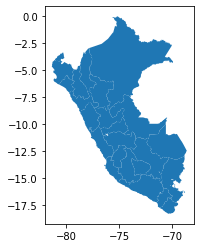

In [14]:
departamentos = gpd.read_file(r'peru/departamentos/DEPARTAMENTOS.shp')
departamentos.plot()

<AxesSubplot:>

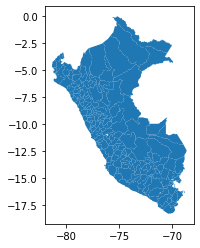

In [17]:
provincias = gpd.read_file(r'peru/provincias/PROVINCIAS.shp')
provincias.plot()

<AxesSubplot:>

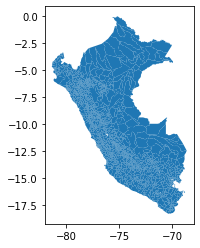

In [18]:
distritos = gpd.read_file(r'peru/distritos/DISTRITOS.shp')
distritos.plot()

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


## Reporta residuos

### Importar y transformar la data

In [74]:
# Usamos pandas para importar la data del archivo previamente descargado con el script 'descarga_rr.py'

rr = pd.read_csv('rr.csv')

# Las columnas originales 'LONGITUD' y 'LATITUD' separan decimales con comas (no puntos).
# Debido a eso, se consideran string y no float.
# El siguiente código las transforma:

longitud_original = rr['LONGITUD']
nueva_longitud = []
for i in longitud_original:
    a = i
    b = a.replace(',','.')
    c = float(b)
    nueva_longitud.append(c)
rr['LONGITUD'] = nueva_longitud

latitud_original = rr['LATITUD']
nueva_latitud = []
for i in latitud_original:
    a = i
    b = a.replace(',','.')
    c = float(b)
    nueva_latitud.append(c)
rr['LATITUD'] = nueva_latitud

# Convertimos el dataframe de RR en un dataframe geo espacial con Geopandas:

rr = gpd.GeoDataFrame(rr, geometry=gpd.points_from_xy(rr.LONGITUD, rr.LATITUD))

# Eliminar columnas que no necesitamos

rr = rr.drop(
    [
        'Unnamed: 0',
        'UBIGEO_DPTO', 
        'UBIGEO_PROV', 
        'UBIGEO_DIST', 
        'NOTIF_CORREO_ENV',
        'PTOCRIT_EXISTENTE',
        'PTOCRIT_INEXISTENTE',
        'DIF_DIA',
        'DIF_HORA',
        'ENTIDAD_FISC_AMB',
        'TIPO_EFA',
        'LONGITUD', # Ya no es necesaria, estará en geometry
        'LATITUD' # Ya no es necesaria, estará en geometry
    ], 
    axis=1)

# Visualizamos la información de la nueva tabla. Prestar atención a la columna 'geometry'.

rr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID_GEN         810 non-null    int64   
 1   OBJECTID       810 non-null    int64   
 2   DEPARTAMENTO   810 non-null    object  
 3   PROVINCIA      810 non-null    object  
 4   DISTRITO       810 non-null    object  
 5   REALIZO_LIMP   190 non-null    object  
 6   PROGRAMO_LIMP  156 non-null    object  
 7   FECHA_TOMA     810 non-null    object  
 8   HORA_FOTO      810 non-null    object  
 9   ESTADO_ALERTA  810 non-null    object  
 10  geometry       810 non-null    geometry
dtypes: geometry(1), int64(2), object(8)
memory usage: 69.7+ KB


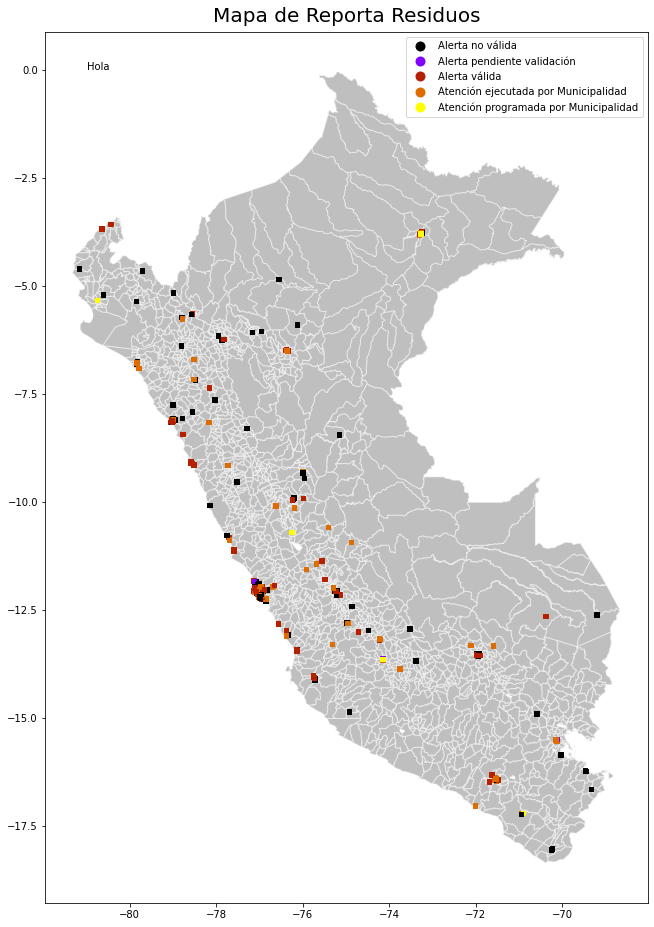

In [161]:
#rr_distritos = distritos.append(rr)
mapa = distritos.plot(
    figsize=(10.80, 19.20), 
    alpha=0.5,
    color='grey',
    edgecolor='white')
mapa.set_title(
    'Mapa de Reporta Residuos', 
    pad = 10,
    fontdict={'fontsize':20, 'color': '#000000'}
    )

alertas = rr.plot(
    ax=mapa, 
    column='ESTADO_ALERTA', 
    markersize=20,
    marker=',',
    legend=True,
    cmap='gnuplot'
    )

texto = plt.text(-81,0, r'Hola')


In [169]:
lugar = 'MIRAFLORES'

distritos_lugar = distritos['NOMBDIST'] == lugar
fdistritos = distritos[distritos_lugar]

rr_lugar = rr['DISTRITO'] == lugar
frr = rr[rr_lugar]





,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
94,04,AREQUIPA,01,AREQUIPA,10,MIRAFLORES,MIRAFLORES,040110,0401,040110,1,MIRAFLORES,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.41081 -16.29694, -71.41103 -16.2..."
487,15,LIMA,01,LIMA,22,MIRAFLORES,MIRAFLORES,150122,1501,150122,1,MIRAFLORES,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-77.02739 -12.10328, -77.02741 -12.1..."
550,10,HUANUCO,05,HUAMALIES,06,MIRAFLORES,MIRAFLORES,100506,1005,100506,35,MIRAFLORES,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-76.91203 -9.36795, -76.91100 -9.368..."
640,15,LIMA,10,YAUYOS,21,MIRAFLORES,MIRAFLORES,151021,1510,151021,5,MIRAFLORES,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-75.93852 -12.10443, -75.93842 -12.1..."


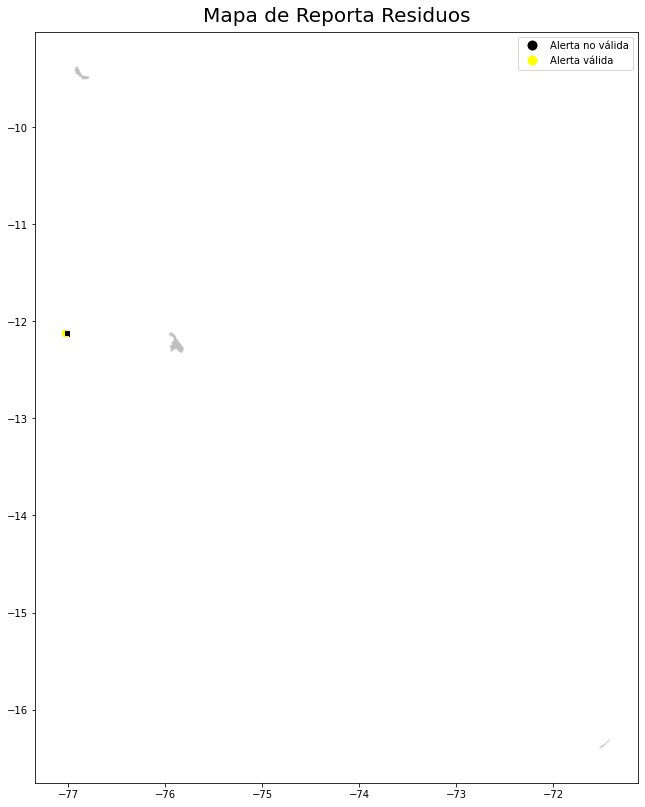

In [170]:
mapa = fdistritos.plot(
    figsize=(10.80, 19.20), 
    alpha=0.5,
    color='grey',
    edgecolor='white')
mapa.set_title(
    'Mapa de Reporta Residuos', 
    pad = 10,
    fontdict={'fontsize':20, 'color': '#000000'}
    )

alertas = frr.plot(
    ax=mapa, 
    column='ESTADO_ALERTA', 
    markersize=20,
    marker=',',
    legend=True,
    cmap='gnuplot'
    )